In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (6,391 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:.2f}".format

In [ ]:
estimate = pd.read_excel('/content/20220316.xlsx')

### 항목명으로 부터 유추하여 '숨고' 분류에 해당하는 업종 칼럼 삽입

In [ ]:
estimate.head()

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,업종
0,차인호,0,차인호,975000,장비 비용,(제외),0,300000,디자인/개발
1,차인호,0,차인호,975000,출장비,(제외),0,20000,디자인/개발
2,차인호,0,차인호,975000,영상 편집,분당,30,25000,디자인/개발
3,차인호,0,차인호,975000,영상 촬영,시간당,3,75000,디자인/개발
4,조상용,1,Ebs,3300000,Vrware,1box,50,66000,기타


In [ ]:
estimate

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,업종
0,차인호,0,차인호,975000,장비 비용,(제외),0,300000,디자인/개발
1,차인호,0,차인호,975000,출장비,(제외),0,20000,디자인/개발
2,차인호,0,차인호,975000,영상 편집,분당,30,25000,디자인/개발
3,차인호,0,차인호,975000,영상 촬영,시간당,3,75000,디자인/개발
4,조상용,1,Ebs,3300000,Vrware,1box,50,66000,기타
5,김태헌,1,홍성도,500000,포스터,50x70cm,1,500000,디자인/개발
6,권귀현,1,장경은,570000,독립운동가 100인 만화 프로젝트 2차,NaN,1,570000,디자인/개발
7,이나현,1,숨고 고인혁 고객님,240000,App Main Design,720x1500px,1,120000,디자인/개발
8,이나현,1,숨고 고인혁 고객님,240000,Web Main Design,1920x3000 px,1,120000,디자인/개발
9,정무관,1,영덕지역자활센터,550000,홈페이지 수정,1식,1,550000,디자인/개발


In [ ]:
estimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   유저명     400 non-null    object
 1   사업자 여부  400 non-null    int64 
 2   클라이언트   370 non-null    object
 3   총 금액    400 non-null    int64 
 4   항목명     382 non-null    object
 5   규격      213 non-null    object
 6   수량      400 non-null    int64 
 7   단가      400 non-null    int64 
 8   업종      329 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


### 불필요한 데이터 제거

1. 테스트용 견적서 작성 추정 항목 제외
2. 클라이언트가 없는 항목 제외
3. 항목명이 없고 총 금액이 '0'인 항목 제외

In [ ]:
wrong_words = ['test', '테스트', '테스트 상품', '추천예시', 'ㅛ요' , '1', 'ㅇ', 'ㅇㅇ', 'ㅇㅇㅇ', 'ㅁㅁ', 'ㅍㅍ', 'ㅗㄴ', 
               '가가가가', '안녕', 'ㄴㄱㄷㄱㄷ', 'ㅇㄴㄷ', '아냥', '가나다']

remove_rows = estimate[(estimate['항목명'].isin(wrong_words))
         | (estimate['클라이언트'].isin(wrong_words))
         | ((estimate['클라이언트'].isnull()))
         | ((estimate['항목명'].isnull()) & (estimate['총 금액'] == 0))
         | (estimate['총 금액'] == 0)].reset_index()
remove_rows

,index,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,업종
0,38,장윤호,1,수경,2000000,test,111,2,1000000,NaN
1,39,장윤호,1,수경,2000000,test,111,2,1000000,NaN
2,49,장주성,1,장주성,10000,테스트,11,1,10000,NaN
3,55,장윤호,1,견적서생성테스트,2000000,test,111,2,1000000,NaN
4,64,송윤회,0,NaN,0,NaN,NaN,1,0,NaN
5,67,장윤호,0,11,0,NaN,NaN,1,0,NaN
6,68,장윤호,1,나다,2000000,test,111,2,1000000,NaN
7,71,안형준,0,한양루브,0,에스오일 유압작동유,20L,0,35000,홈/리빙
8,82,안녕,1,수경,0,NaN,NaN,1,0,NaN
9,86,김동현,1,김수경,101111,안녕,11,1,101111,NaN


### 총 데이터 400개 중 79개의 제거할 데이터 추출

In [ ]:
df = estimate.copy()

df = df.drop(df[(df['항목명'].isin(wrong_words))
         | (df['클라이언트'].isin(wrong_words))
         | ((df['클라이언트'].isnull()))
         | ((df['항목명'].isnull()) & (df['총 금액'] == 0))
         | (df['총 금액'] == 0)].index).reset_index()
df

,index,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,업종
0,0,차인호,0,차인호,975000,장비 비용,(제외),0,300000,디자인/개발
1,1,차인호,0,차인호,975000,출장비,(제외),0,20000,디자인/개발
2,2,차인호,0,차인호,975000,영상 편집,분당,30,25000,디자인/개발
3,3,차인호,0,차인호,975000,영상 촬영,시간당,3,75000,디자인/개발
4,4,조상용,1,Ebs,3300000,Vrware,1box,50,66000,기타
5,5,김태헌,1,홍성도,500000,포스터,50x70cm,1,500000,디자인/개발
6,6,권귀현,1,장경은,570000,독립운동가 100인 만화 프로젝트 2차,NaN,1,570000,디자인/개발
7,7,이나현,1,숨고 고인혁 고객님,240000,App Main Design,720x1500px,1,120000,디자인/개발
8,8,이나현,1,숨고 고인혁 고객님,240000,Web Main Design,1920x3000 px,1,120000,디자인/개발
9,9,정무관,1,영덕지역자활센터,550000,홈페이지 수정,1식,1,550000,디자인/개발


많이 쓰인 단어 및 워드클라우드

In [ ]:
df1 = df['항목명']
df1

0                                                  장비 비용
1                                                    출장비
2                                                  영상 편집
3                                                  영상 촬영
4                                                 Vrware
5                                                    포스터
6                                  독립운동가 100인 만화 프로젝트 2차
7                                        App Main Design
8                                        Web Main Design
9                                                홈페이지 수정
10                                               K5 1234
11                                                    로고
12                                           홍보 웹툰 제작 1편
13                                                    로고
14                                            죽은 가지제거 작업
15                                                   스카이
16                                                   디자인
17                             

In [ ]:
df1.to_csv('doss.text',sep = '\t', index = False)

In [ ]:
text = open('/content/doss.text','rt', encoding='UTF-8').read()

In [ ]:
pip install konlpy 

In [ ]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()
line =[]

line = okt.pos(text)

n_adj =[]
for word, tag in line:
    if tag in ['Noun','Adjective']:
        n_adj.append(word)
print(n_adj)

['항목', '장비', '비용', '출장', '비', '영상', '편집', '영상', '촬영', '포스터', '독립운동가', '인', '만화', '프로젝트', '차', '홈페이지', '수정', '로고', '홍보', '웹툰', '제작', '편', '로고', '가지', '제거', '작업', '스카이', '디자인', '필름', '명사', '로고', '디자인', '층', '천장', '라인', '포설', '층', '호흡기', '클리', '닉', '설치', '및', '카드', '기', '라인', '포설', '코로나', '진료', '실', '라인', '포설', '층', '설치', '및', '게스트', '망', '분리', '및', '시스템', '구축', '시스템', '개발', '이벤트', '페이지', '퍼블리싱', '및', '진행중', '이벤트', '종료', '이벤트', '구분', '스토어', '매장', '안내', '퍼블리싱', '상품', '상세', '페이지', '커스터', '마이', '징', '색상', '사이즈', '연관', '상품', '데님', '퍼블리싱', '주문', '페이지', '디자인', '기능', '개발', '반응', '레이아웃', '제작', '모바일', '햄버거', '메뉴', '카테고리', '커스터', '마이', '징', '메인', '페이지', '컨텐츠', '영역', '퍼블리싱', '슬라이드', '배너', '큐', '레이', '션', '에디', '토', '리얼', '브랜드', '소개', '지속', '가능한', '퍼블리싱', '상품', '목록', '페이지', '상단', '롤링', '배너', '룩북', '스타', '일링', '갤러리', '페이지', '퍼블리싱', '홈페이지', '미당', '메뉴', '가로', '헨', '호텔', '조식', '메뉴', '포스터', '미당', '메뉴', '세로', '포스터', '큐방', '미당', '메뉴', '택배', '비', '앨범', '프로모션', '영상', '콘텐츠', '제작', '배너', '디자인', '완전', '포크리프트', '

In [ ]:
stop_words = "비 및 종 겉" 
stop_words = set(stop_words.split(' '))

n_adj = [word for word in n_adj if not word in stop_words]

In [ ]:
counts = Counter(n_adj)
tags = counts.most_common(20)

In [ ]:
tags

[('디자인', 49),
 ('로고', 14),
 ('홈페이지', 10),
 ('개발', 10),
 ('제작', 9),
 ('배너', 9),
 ('시안', 9),
 ('작업', 8),
 ('퍼블리싱', 8),
 ('메이크업', 7),
 ('헤어', 7),
 ('이미지', 7),
 ('실크', 7),
 ('플라워', 7),
 ('수정', 6),
 ('페이지', 6),
 ('모바일', 6),
 ('메뉴', 6),
 ('보리', 6),
 ('유리', 6)]

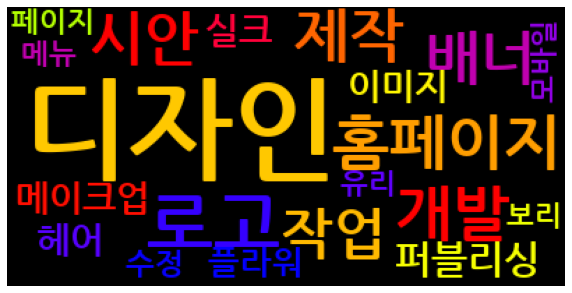

In [ ]:
from wordcloud import WordCloud


font='/content/BMDOHYEON.ttf'
word_cloud = WordCloud(font_path=font, background_color='black',colormap='prism').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('워드클라우드.png', bbox_inches='tight')
plt.show()

### 업종별 데이터 확인

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df2 = df['업종'].value_counts()
df2

디자인/개발    149
홈/리빙       73
기타         72
건강/미용      11
비지니스        9
이벤트         3
Name: 업종, dtype: int64

In [ ]:
plt.rc('font', family='NanumBarunGothic')

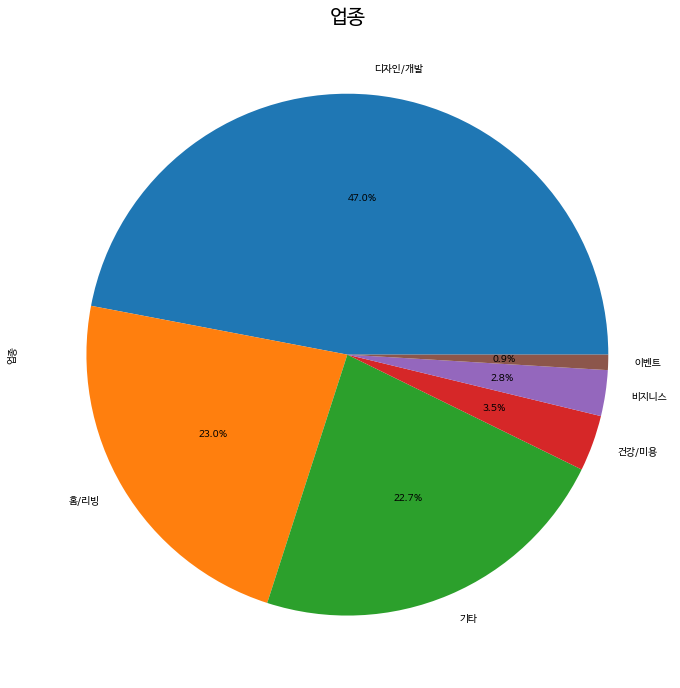

In [ ]:
explode = (0, 0, 0, 0, 0, 0)
df2.plot(kind='pie', explode=explode, figsize=(16,12), autopct='%1.1f%%')
plt.title('업종', size=20)
plt.show()

In [ ]:
dd = df.groupby('업종')['총 금액'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=False)
dd

,mean,sum,max
업종,,,
이벤트,4166666.67,12500000,5500000
홈/리빙,3794238.36,276979400,28129500
기타,2276451.12,163904481,44000000
디자인/개발,1719633.86,256225445,20000000
비지니스,691111.11,6220000,1800000
건강/미용,681818.18,7500000,1000000


In [ ]:
평균 = dd['mean'].sort_values()

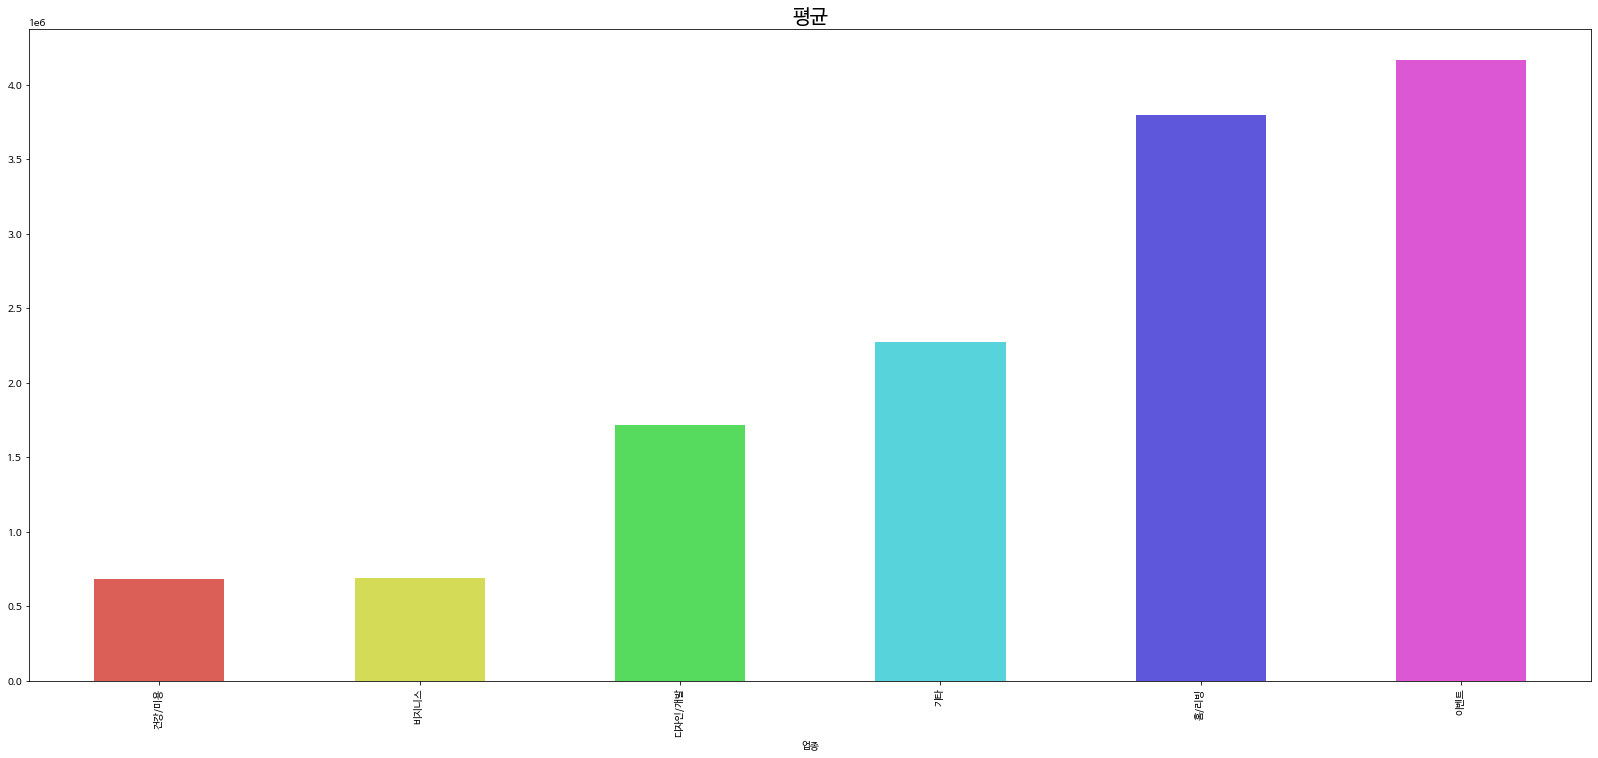

In [ ]:
color = sns.color_palette('hls',len(평균))
평균.plot(kind='bar',color=color)
plt.title('평균', size=20)
plt.show()

In [ ]:
최대 = dd['max'].sort_values()

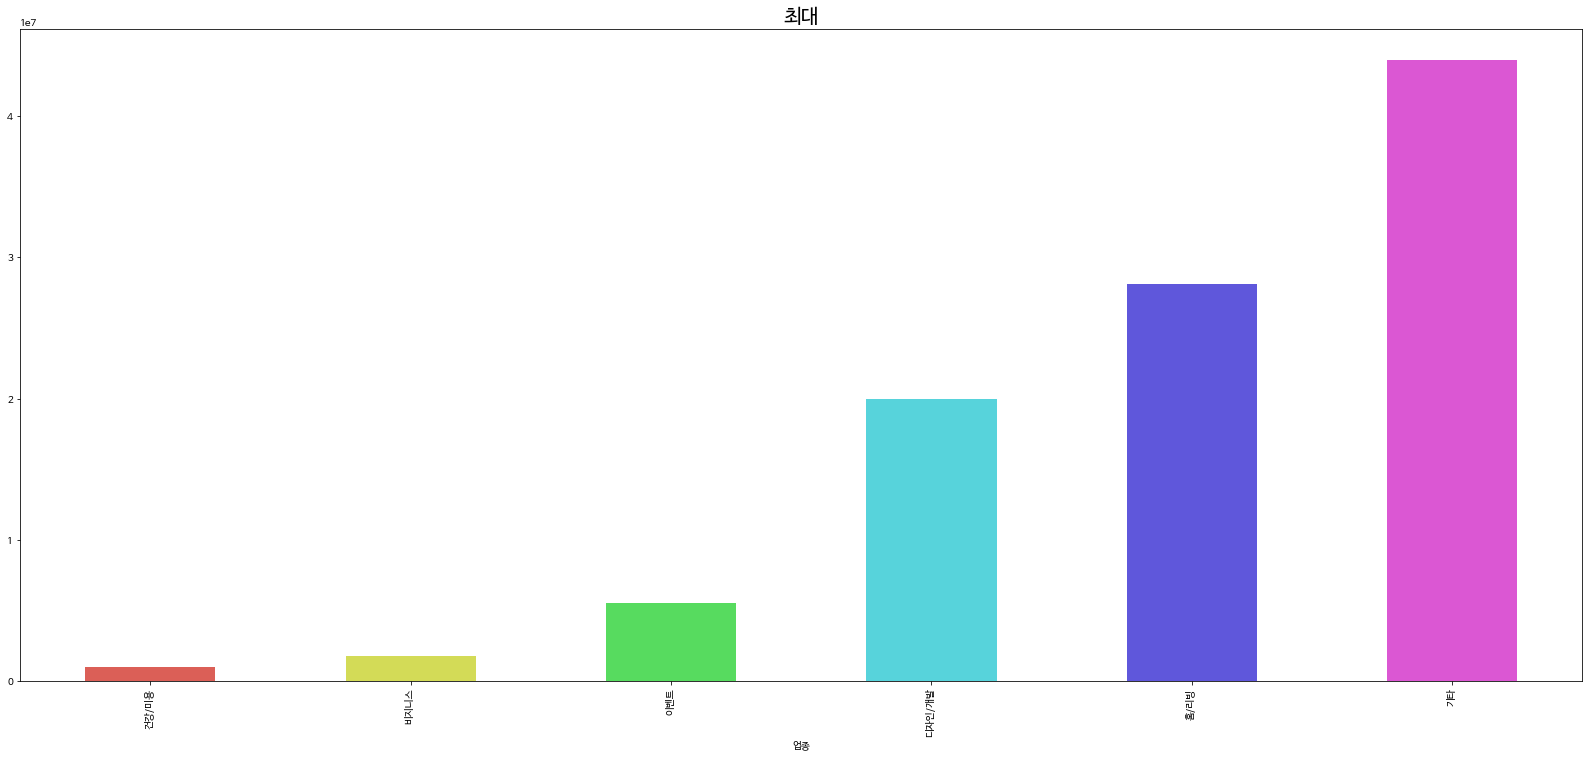

In [ ]:
color = sns.color_palette('hls',len(최대))
최대.plot(kind='bar',color=color)
plt.title('최대', size=20)
plt.show()

In [ ]:
총합 = dd['sum'].sort_values()

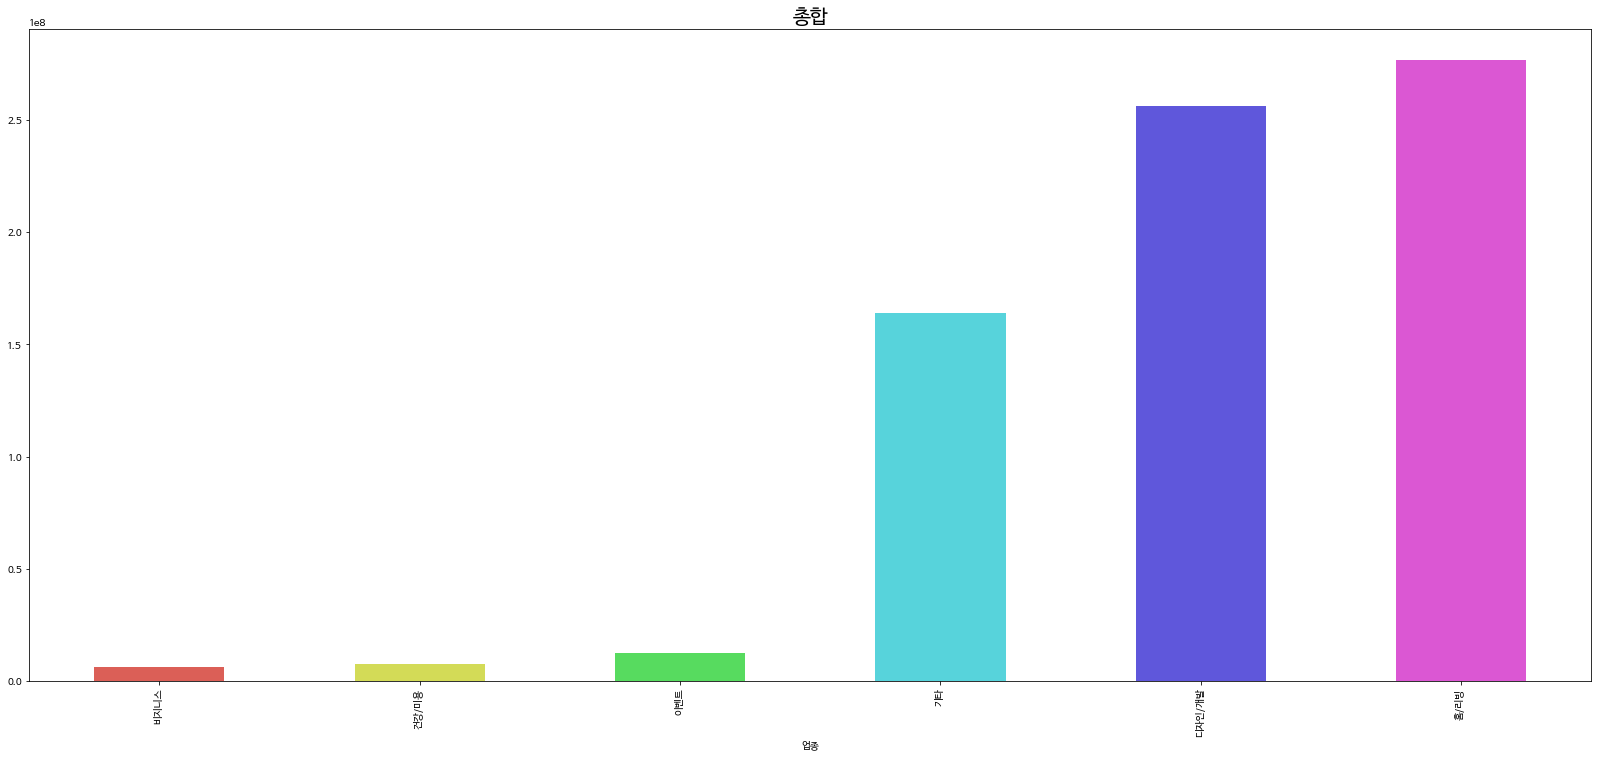

In [ ]:
color = sns.color_palette('hls',len(총합))
총합.plot(kind='bar',color=color)
plt.title('총합', size=20)
plt.show()

In [ ]:
df[df['업종'] == '이벤트']

,index,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,업종
18,18,김혜경,1,제주영상문화산업진흥원 김하섭 선임연구원님,5500000,명사,NaN,1,5500000,이벤트
57,61,아트버스킹,1,차라리낭만,3500000,PM,NaN,1,2000000,이벤트
58,62,아트버스킹,1,차라리낭만,3500000,PA,NaN,1,1500000,이벤트


In [ ]:
table1 = pd.pivot_table(df,
                     index = ['유저명', '클라이언트'],
                     columns = '업종',
                     values = '총 금액',
                     fill_value=0)
table1

업종                                    건강/미용          기타      디자인/개발     비지니스  \
유저명         클라이언트                                                              
LEEYOU SANG 박민찬                           0        0.00        0.00  1000000   
            아이들랩                          0        0.00        0.00   750000   
silius      자운영                           0  5500000.00        0.00        0   
강예진         고객님                           0        0.00        0.00   400000   
강재훈         강재훈                           0  2000000.00        0.00        0   
강혜은         페이워크 마케팅팀                     0        0.00    20000.00        0   
강희성         강희성                           0    88000.00        0.00        0   
            당동중                           0        0.00      310.00        0   
            일광                            0        0.00        0.00        0   
곽유신         박두석                           0        0.00 20000000.00        0   
            한양대학교                         0        0.00        0.00  1800000   
곽철한         서지섭                           0        0.00        0.00        0   
구은성         율봉로79번길36                     0        0.00        0.00        0   
권귀현         장경은                           0        0.00   570000.00        0   
권오금         최영환                           0        0.00        0.00        0   
김경수         김하림                           0        0.00        0.00   100000   
김성자         김다솜                           0    11400.00        0.00        0   
            박다솜                           0    11400.00        0.00        0   
김성하         김성하                           0    38333.33  2623000.00        0   
            최유나                           0        0.00  2082000.00        0   
            한국탐정법인                        0        0.00  2915000.00        0   
김송의         강병찬                           0        0.00   120000.00        0   
            김려원                           0        0.00  2280000.00        0   
            백진충                           0        0.00   385000.00        0   
            손지인                           0        0.00   486383.33        0   
            정유조                           0        0.00   363000.00        0   
            정훈철                           0        0.00   264000.00        0   
김우석         밤바다                           0   400000.00        0.00        0   
            정해성                           0    50000.00        0.00        0   
            진녹음실                          0   695000.00        0.00        0   
김은비         박형식                           0        0.00        0.00        0   
김을수         카카상회                          0  5000000.00        0.00        0   
김재영         김재영                           0        0.00 10000000.00        0   
김정민         김정만                           0    15000.00        0.00        0   
김주호         김주호                           0        1.00        0.00        0   
김지연         기술면집백밀원                       0        0.00   253000.00        0   
            담당자                           0        0.00  2550000.00        0   
김지은         정재민                           0        0.00   500000.00        0   
김진성         홍길동                           0        0.00   150000.00        0   
김진수         김때땡                           0    10000.00        0.00        0   
김태수         아트맵                           0        0.00    50000.00        0   
김태헌         홍성도                           0        0.00   500000.00        0   
김현용         이승현                           0        0.00        0.00        0   
김형준         송미경                           0        0.00 13000000.00        0   
김형희         김이아                           0        0.00        0.00        0   
김혜경         제주영상문화산업진흥원 김하섭 선임연구원님        0        0.00        0.00        0   
김홍록         의료법인 한미의료재단                   0        0.00        0.00        0   
김홍찬         홍길동                           0        0.00 15000000.00        0   


### 사업자 여부 유무에 따른 데이터 확인

In [ ]:
사업자여부 = df['사업자 여부'].value_counts()
사업자여부

1    177
0    144
Name: 사업자 여부, dtype: int64

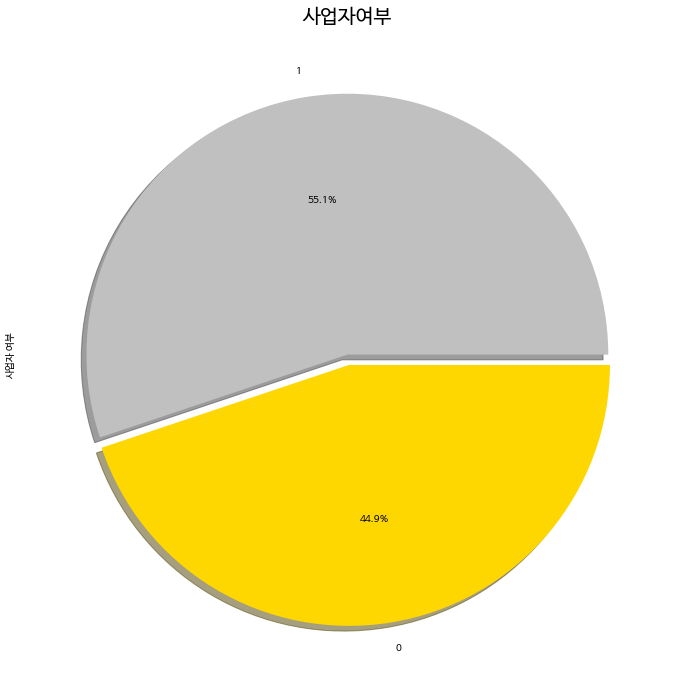

In [ ]:
explode = (0,0.04)
colors = ['silver', 'gold']
사업자여부.plot(kind='pie', explode=explode, figsize=(16,12), autopct='%1.1f%%', shadow=True,colors=colors)
plt.title('사업자여부', size=20)
plt.show()

- 사업자 여부에 따른 업종 분포도 확인

In [ ]:
table2 = pd.pivot_table(df,
                     index = ['유저명', '사업자 여부'],
                     columns = '업종',
                     values = '총 금액',
                     aggfunc=np.sum,
                     fill_value=0)
table2

업종                    건강/미용        기타    디자인/개발     비지니스      이벤트       홈/리빙
유저명         사업자 여부                                                          
LEEYOU SANG 0             0         0         0   750000        0          0
            1             0         0         0  1000000        0          0
silius      1             0  11000000         0        0        0          0
강예진         0             0         0         0   400000        0          0
강재훈         1             0   2000000         0        0        0          0
강혜은         0             0         0     20000        0        0          0
강희성         0             0         0       310        0        0          0
            1             0     88000         0        0        0     300000
곽유신         0             0         0  20000000  3600000        0          0
곽철한         1             0         0         0        0        0     840000
구은성         0             0         0         0        0        0    1080000
권귀현         1             0         0    570000        0        0          0
권오금         1             0         0         0        0        0     675000
김경수         0             0         0         0   100000        0          0
김성자         0             0     22800         0        0        0          0
김성하         0             0    115000  24152000        0        0          0
            1             0         0  10492000        0        0          0
김송의         0             0         0   1504800        0        0          0
            1             0         0   8656800        0        0          0
김우석         0             0   2635000         0        0        0          0
김은비         0             0         0         0        0        0      40000
김을수         1             0   5000000         0        0        0          0
김재영         1             0         0  10000000        0        0          0
김정민         0             0     15000         0        0        0          0
김주호         0             0         1         0        0        0          0
김지연         1             0         0  11718000        0        0          0
김지은         1             0         0    500000        0        0          0
김진성         1             0         0    150000        0        0          0
김진수         0             0     10000         0        0        0          0
김태수         0             0         0     50000        0        0          0
김태헌         1             0         0    500000        0        0          0
김현용         0             0         0         0        0        0      90000
김형준         0             0         0  13000000        0        0          0
김형희         1             0         0         0        0        0     504000
김혜경         1             0         0         0        0  5500000          0
김홍록         0             0         0         0        0        0    4400000
김홍찬         0             0         0  15000000        0        0          0
김효림         0             0         0   1640000        0        0          0
도현진         1             0   8000000         0        0        0          0
디자인소나무      1             0         0         0        0        0    3200000
몽실아빠        0             0    270000         0        0        0          0
문정운         1             0   5200000         0        0        0          0
문정환         1             0         0         0        0        0    3580000
민경홍         0             0         0         0        0        0    5600000
민디자인        1             0         0    234000        0        0          0
박병종         1             0         0    600000        0        0          0
박상현         0             0         0     10000        0        0          0
박새아롬        1             0         0   1200000        0        0          0
박소은         0             0     12000         0        0        0          0
박수민         1             0         0         0        0        0    5280